In [12]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn import preprocessing
plt.rc("font", size=14)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Data

In [2]:
data = pd.read_csv('models/morph_stats_test.csv', index_col=0)
data = data.drop('image_name', axis=1)
data = data.drop('prob_0', axis=1)
data = data.drop('prob_1', axis=1)
data

,status,area,endpoints,intersection_points,median_tortuosity,tortuosity_index,length,perimeter,BA_mean,BA_std,BA_median,D0,D1,D2,SL,pred_status
1,0.0,0.241146,242.0,1016.0,1.078423,1.091948,41.755515,89.058218,97.409416,41.466111,92.045408,1.568623,1.554390,1.537124,0.571254,1.0
2,0.0,0.267278,316.0,1259.0,1.078081,1.086922,47.163914,99.976946,101.127149,42.166498,98.130102,1.586201,1.570124,1.553828,0.634216,0.0
3,0.0,0.146918,104.0,374.0,1.081524,1.110732,16.421951,35.132631,103.657447,42.680454,108.913930,1.499439,1.492701,1.482476,0.611228,1.0
4,0.0,0.144168,129.0,487.0,1.077366,1.085169,18.618497,38.647828,95.715414,40.722771,92.205188,1.518087,1.509306,1.498002,0.755765,0.0
5,0.0,0.143721,102.0,418.0,1.081569,1.100095,17.827527,37.688114,100.286770,42.567115,103.100874,1.512124,1.498284,1.483765,0.753090,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,1.0,0.180328,113.0,157.0,1.076809,1.082496,13.327404,29.089298,88.199197,52.168828,91.564415,1.505306,1.497587,1.471764,0.434897,0.0
67,1.0,0.244646,106.0,194.0,1.078443,1.108702,18.889354,41.999986,87.628002,52.921482,85.236373,1.516205,1.511284,1.500414,0.408745,1.0
68,1.0,0.292205,58.0,194.0,1.080999,1.103769,19.932173,43.875879,88.508081,51.369070,90.000000,1.541371,1.529076,1.522426,0.721521,0.0
69,1.0,0.162429,104.0,118.0,1.088718,1.138351,12.248699,27.888638,91.656457,50.824058,83.088773,1.438518,1.411320,1.389260,0.516779,1.0


Correlation Matrix

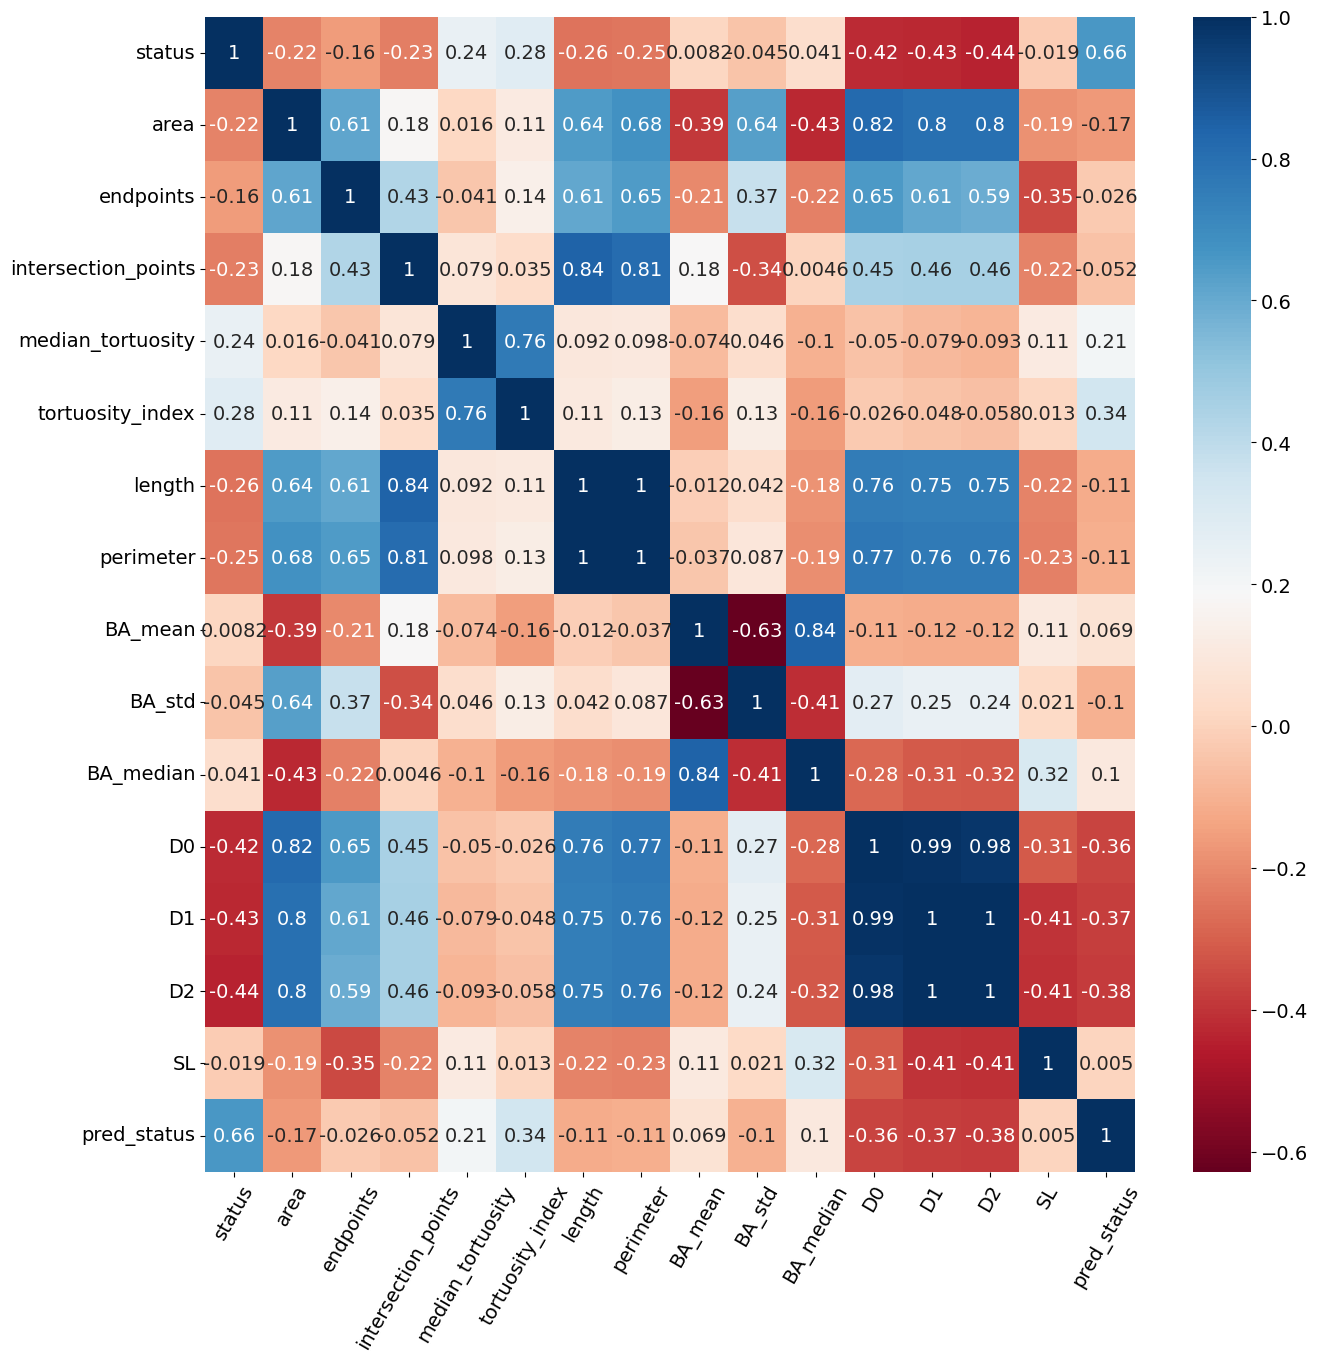

In [3]:
corr_matrix = data.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corr_matrix, annot=True, cmap='RdBu')
plt.xticks(rotation = 60) 
plt.show()

Logistic Regression

In [8]:
print('For real status')

X, y = data.iloc[:, 1:-1].values, data.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2, 
                     random_state=123, 
                     stratify=y)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

model = LogisticRegression()

model.fit(X_train_std, y_train)

print('Training accuracy:', np.mean(model.predict(X_train_std) == y_train)*100)
print('Test accuracy:', np.mean(model.predict(X_test_std) == y_test)*100)

sfs1 = SFS(model, 
           k_features="best",
           forward=False, 
           floating=True, 
           verbose=0,
           scoring='accuracy',
           cv=5)


sfs1 = sfs1.fit(X_train_std, y_train)

print('selected features:\n', list(data.columns[1:][list(sfs1.k_feature_idx_)]))

X_train_sele = sfs1.transform(X_train_std)
X_test_sele = sfs1.transform(X_test_std)

model.fit(X_train_sele, y_train)
print('Training accuracy:', np.mean(model.predict(X_train_sele) == y_train)*100)
print('Test accuracy:', np.mean(model.predict(X_test_sele) == y_test)*100)

Training accuracy: 85.71428571428571
Test accuracy: 57.14285714285714
selected features:
 ['area', 'intersection_points', 'median_tortuosity', 'length', 'perimeter', 'BA_mean', 'BA_std', 'BA_median', 'D1', 'D2', 'SL']
Training accuracy: 83.92857142857143
Test accuracy: 64.28571428571429


In [7]:
print('For predicted status')

X, y = data.iloc[:, 1:-1].values, data.iloc[:, -1].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2, 
                     random_state=123, 
                     stratify=y)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

model = LogisticRegression()

model.fit(X_train_std, y_train)

print('Training accuracy:', np.mean(model.predict(X_train_std) == y_train)*100)
print('Test accuracy:', np.mean(model.predict(X_test_std) == y_test)*100)

sfs1 = SFS(model, 
           k_features="best",
           forward=False, 
           floating=True, 
           verbose=0,
           scoring='accuracy',
           cv=5)


sfs1 = sfs1.fit(X_train_std, y_train)

print('selected features:\n', list(data.columns[1:][list(sfs1.k_feature_idx_)]))

X_train_sele = sfs1.transform(X_train_std)
X_test_sele = sfs1.transform(X_test_std)

model.fit(X_train_sele, y_train)
print('Training accuracy:', np.mean(model.predict(X_train_sele) == y_train)*100)
print('Test accuracy:', np.mean(model.predict(X_test_sele) == y_test)*100)

Training accuracy: 82.14285714285714
Test accuracy: 64.28571428571429
selected features:
 ['area', 'endpoints', 'tortuosity_index', 'BA_mean', 'BA_std', 'D0', 'D2']
Training accuracy: 82.14285714285714
Test accuracy: 64.28571428571429


K Neighbors Classifier

In [11]:
print('For real status')

X, y = data.iloc[:, 1:-1].values, data.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2, 
                     random_state=123, 
                     stratify=y)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train_std, y_train)

print('Training accuracy:', np.mean(model.predict(X_train_std) == y_train)*100)
print('Test accuracy:', np.mean(model.predict(X_test_std) == y_test)*100)

sfs1 = SFS(model, 
           k_features="best",
           forward=False, 
           floating=True, 
           verbose=0,
           scoring='accuracy',
           cv=5)


sfs1 = sfs1.fit(X_train_std, y_train)

print('selected features:\n', list(data.columns[1:][list(sfs1.k_feature_idx_)]))

X_train_sele = sfs1.transform(X_train_std)
X_test_sele = sfs1.transform(X_test_std)

model.fit(X_train_sele, y_train)
print('Training accuracy:', np.mean(model.predict(X_train_sele) == y_train)*100)
print('Test accuracy:', np.mean(model.predict(X_test_sele) == y_test)*100)

For real status
Training accuracy: 85.71428571428571
Test accuracy: 71.42857142857143
selected features:
 ['area', 'tortuosity_index', 'BA_mean', 'D1', 'SL']
Training accuracy: 85.71428571428571
Test accuracy: 50.0


In [10]:
print('For predicted status')

X, y = data.iloc[:, 1:-1].values, data.iloc[:, -1].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2, 
                     random_state=123, 
                     stratify=y)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train_std, y_train)

print('Training accuracy:', np.mean(model.predict(X_train_std) == y_train)*100)
print('Test accuracy:', np.mean(model.predict(X_test_std) == y_test)*100)

sfs1 = SFS(model, 
           k_features="best",
           forward=False, 
           floating=True, 
           verbose=0,
           scoring='accuracy',
           cv=5)


sfs1 = sfs1.fit(X_train_std, y_train)

print('selected features:\n', list(data.columns[1:][list(sfs1.k_feature_idx_)]))

X_train_sele = sfs1.transform(X_train_std)
X_test_sele = sfs1.transform(X_test_std)

model.fit(X_train_sele, y_train)
print('Training accuracy:', np.mean(model.predict(X_train_sele) == y_train)*100)
print('Test accuracy:', np.mean(model.predict(X_test_sele) == y_test)*100)

For predicted status
Training accuracy: 75.0
Test accuracy: 64.28571428571429
selected features:
 ['area', 'intersection_points', 'tortuosity_index', 'perimeter', 'BA_median', 'D0', 'SL']
Training accuracy: 73.21428571428571
Test accuracy: 57.14285714285714


Random Forest

For real status


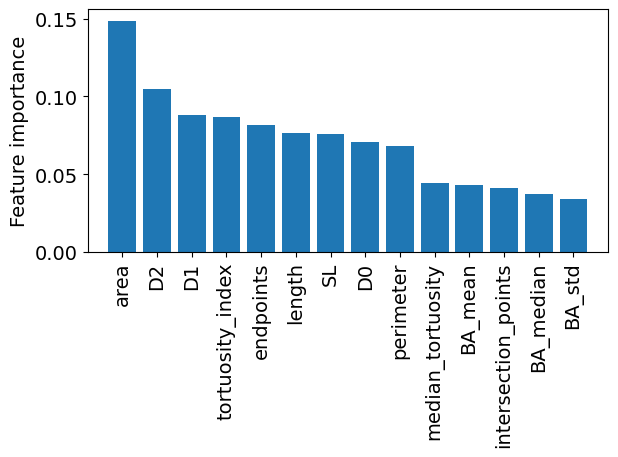

In [14]:
print('For real status')

X, y = data.iloc[:, 1:-1].values, data.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2, 
                     random_state=123, 
                     stratify=y)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

plt.ylabel('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

feat_labels = data.columns[1:-1]
plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)

plt.xlim([-1, X_train.shape[1]])

plt.tight_layout()
plt.show()

For predicted status


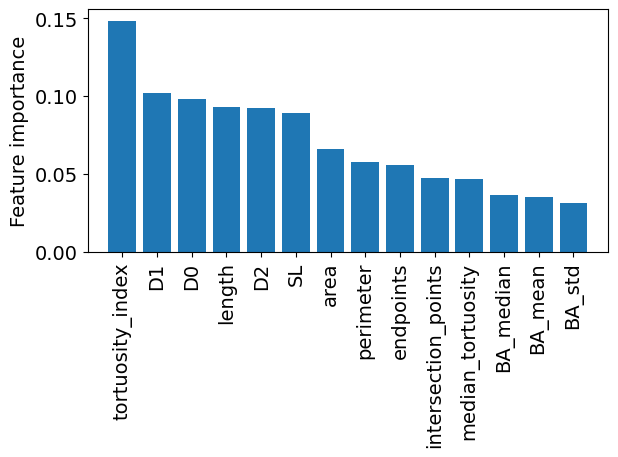

In [15]:
print('For predicted status')

X, y = data.iloc[:, 1:-1].values, data.iloc[:, -1].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2, 
                     random_state=123, 
                     stratify=y)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

plt.ylabel('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

feat_labels = data.columns[1:-1]
plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)

plt.xlim([-1, X_train.shape[1]])

plt.tight_layout()
plt.show()